# Execrcise 3 - Cat Classification

In this exercise you will develop a logistic regression classifier for classifying images of cats. You will train and test the classifier using the accompanying database of images saved in the h5 format. You will then be able to test the classifier on your own images.

Apart from the notebook you will need to place on the same directory the following:
     lr_utils.py
     datssets <directory>
    

### Libraires 
Make sure the following libraires below are all installed on your system, they are typiaclly included in standard Anaconda.

In [32]:
import numpy as np
import pandas as pd
import scipy
from scipy import ndimage
import matplotlib
import matplotlib.pyplot as plt
import h5py
import skimage
import skimage.transform


### Local Libraires
Make sure the file lr_utils.py is saved in the same directory as the notebook. 

In [33]:
from lr_utils import load_dataset


### Loading the data into memory

Load the data and look at the dimesions of the new data objects, notice also the size of the training and testing set.

In [34]:
#Loading  train an d test data
train_set_x_orig,train_set_y,test_set_x_orig,test_set_y,classes=load_dataset()
#Lets get some basic data about our image numpy arrays
m_train = train_set_x_orig.shape[0]
m_test = test_set_x_orig.shape[0]
num_px = train_set_x_orig.shape[1]

print("Number of training examples: m_train = " + str(m_train))
print("Number of test examples: m_test = " + str(m_test))
print("Height/Width of each image: num_px = " + str(num_px))
print("Each image is of size: ("+ str(num_px) + ", " + str(num_px) + ", 3)")
print("train_set_x shape: " + str(train_set_x_orig.shape))
print("train_set_y shape: " + str(train_set_y.shape))
print("test_set_x shape : " + str(test_set_x_orig.shape))
print("test_set_y shape: "+ str(test_set_y.shape))


Number of training examples: m_train = 209
Number of test examples: m_test = 50
Height/Width of each image: num_px = 64
Each image is of size: (64, 64, 3)
train_set_x shape: (209, 64, 64, 3)
train_set_y shape: (1, 209)
test_set_x shape : (50, 64, 64, 3)
test_set_y shape: (1, 50)


To better understand the data set let us look at one item in the data. This is  the 3D matrix: 

In [35]:
print(train_set_x_orig[22])

[[[164 178 186]
  [165 179 187]
  [167 180 189]
  ...
  [166 177 181]
  [166 177 181]
  [165 176 181]]

 [[163 177 186]
  [166 179 187]
  [168 180 189]
  ...
  [168 177 182]
  [166 177 181]
  [166 177 181]]

 [[163 178 187]
  [166 180 188]
  [168 181 190]
  ...
  [168 178 183]
  [168 178 183]
  [167 178 182]]

 ...

 [[144 118  80]
  [133 108  72]
  [ 64  56  39]
  ...
  [122 101  70]
  [105  88  62]
  [156 125  86]]

 [[144 118  80]
  [112  94  70]
  [ 37  50  66]
  ...
  [ 96  82  60]
  [113  93  65]
  [164 130  89]]

 [[146 119  80]
  [108  88  63]
  [ 31  38  44]
  ...
  [107  90  61]
  [140 113  75]
  [158 128  85]]]


And the following function applies matplotlib libraries to show the image graphically as well as the classification annotation:

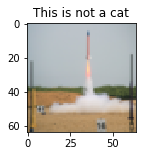

In [36]:
ROWS=64;COLS=64;CHANNELS=3;
classes = {0:'not a cat',
           1:'a cat'}
def show_image(X, y, idx):
    image = X[idx]
    image = image.reshape((ROWS, COLS, CHANNELS))
    plt.figure(figsize=(4,2))
    plt.imshow(image)
    plt.title("This is {}".format(classes[y[0,idx]]))
    plt.show()
    
show_image(train_set_x_orig, train_set_y, 22)

To make it easier to use these objects with standard NumPy library we changr the shape of the array, make sure you are clear about the new dimensions.

In [37]:
# We flatten the numpy array from (num_px, num_px, 3) to (num_px*num_px*3, 1) 
# this will make it easier for us so that each image in one numpy array column
train_set_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0], -1).T
test_set_x_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[0], -1).T

print("train_set_x_flatten shape: " + str(train_set_x_flatten.shape))
print("train_set_y shape: " + str(train_set_y.shape))
print("test_set_x_flatten shape: "+ str(test_set_x_flatten.shape))
print("test_set_y shape: "+ str(test_set_y.shape))

#Standardize the dataset for images by dividing each by 255
train_set_x = train_set_x_flatten/255
test_set_x = test_set_x_flatten/255

train_set_x_flatten shape: (12288, 209)
train_set_y shape: (1, 209)
test_set_x_flatten shape: (12288, 50)
test_set_y shape: (1, 50)


## Logistic Regression Functions

In ther next section we will write the main functions seperatly and bring them all together into a model. 

In [38]:
#We will be using a sigmoid function for our Activation, in Neural Networks most are not ReLU due to speed of calc

def sigmoid(z):
    s = 1/(1+np.exp(-(z)))
    return s

#Create function to set both w and b to 0 to start with
def initialize_with_zeros(dim):
    w = np.zeros((dim,1))
    b = 0
    return w,b


Write the code for  function
>**<font color=blue>propagate</font>(<font color=brown>w,b,X,Y</font>)**<br>
   
 as follows:
 1. Compute the output 'A' for the weights w,b, and input X
    The product of a matrix and vetor is computed with the numpy function
    np.dot, np.dot(Mat,Vec), make sure the dimesions allign you might need
    to transpose the matric with 'A.T'
 2. Compute the cost/J (see lession 11), make sure the cost is returned 
     as a scallar, in case your computation returns a 1x1x1 matrix you can 
     use the numpy function squeez, np.squeez()
 3. Compute the direction of the gradient (grads) dw, db
 4. Return the grads and cost 

In [ ]:
def propagate(w, b, X, Y):
    ###############################
    ###   Write your code  here  ##
    ###############################


    ###############################
    return grads,cost

Write the code for  function
>**<font color=blue>optimize</font>(<font color=brown>w,b,X,Y,num_iterations,learning_rate</font>)**<br>
   
 as follows:
 1. Execute one intration of with propagate and save cost and grads
 2. apdate the weights w and b appropriatly
 3. save the cost of every 100th iteration in a list 'costs'
 4. return weights, gradients and costs 


In [45]:
def optimize(w,b,X,Y):
    costs=[]
    for i in range(num_iterations):
        ###############################
        ###   Write your code  here  ##
        ###############################


        ###############################
        if i % 100 == 0:
            costs.append(cost)

    return params,grads,costs

The code below gives a probability forecast and as such the model will be a regression model and not a classifier. Modify the code below for
>**<font color=blue>predict</font>(<font color=brown>w,b,X</font>)**<br>

to convert the model into a classifier 

In [48]:
def predict(w, b, X):
    m = X.shape[1]
    Y_prediction = np.zeros((1,m))
    w = w.reshape(X.shape[0],1)
    A = sigmoid(np.dot(w.T,X)+b)
    #########################################
    ###   Modify code in this region only  ##
    #########################################

    Y_prediction=A

    #########################################
    return(Y_prediction)

## Constructing the model
The model is brought together in the following function

In [54]:
def model(X_train, Y_train, X_test, Y_test, num_iterations = 2000, learning_rate = 0.5, print_cost = False):
    global D
    #Initialize paramters with 0
    w,b = initialize_with_zeros(X_train.shape[0])
    #Perform Gradient Descent
    parameters, grads, costs = optimize(w,b,X_train,Y_train,num_iterations,learning_rate,print_cost)
    #Retrieve parameters w and b from dictionary "parameters"
    w = parameters["w"]
    b = parameters["b"]
    #Predict test/train set examples
    Y_prediction_test = predict(w,b,X_test)
    Y_prediction_train = predict(w,b,X_train)
    
    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test,
         "Y_prediction_train": Y_prediction_train,
         "w":w,
         "b":b,
         "learning_rate": learning_rate,
         "num_iterations": num_iterations}
    D = d
    return(100-np.mean(np.abs(Y_prediction_train-Y_train))*100,100-np.mean(np.abs(Y_prediction_test-Y_test))*100)


In [61]:
train_accuracy,test_accuracy=model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations=1000, learning_rate=0.005, print_cost=True)
print("train accuracy: {} %".format(train_accuracy))
print("test accuracy: {} %".format(test_accuracy))


train accuracy: 96.65071770334929 %
test accuracy: 72.0 %


### Learning Curve
Write a script that would chart the learning curve of the model, identify after how many iterations over fitting will be observed, what is the accuracy on the test data for this number of iterations?

In [ ]:
###############################
###   Write your code  here  ##
###############################


###############################

## Cross Validation

Divide the training set into three groups of 69 images, and use cross validation to find the number optimal number of iterations, what is the performance on the test set for this number of iterations?

In [ ]:
###############################
###   Write your code  here  ##
###############################


###############################

## Test your own image
Create a new file in the same directory <myImages> and place there images of your choice, the function below will attempt to determine whether they are cats. How succseful is the model compaered to your own annotation?


In [62]:
def run_on_own_image(my_image):
    fname = my_image
    image = np.array(ndimage.imread(fname,flatten=False))
    my_image = scipy.misc.imresize(image, size=(num_px,num_px)).reshape((1,num_px*num_px*3)).T
    my_predicted_image = predict(D["w"], D["b"],my_image)
    
    plt.imshow(image)
    print("y = " + str(np.squeeze(my_predicted_image)) + ", your algorithm predicted a \"" 
      + classes[int(np.squeeze(my_predicted_image)),].decode("utf-8") + "\" picture.")
    labelText = tk.Label(text="Your algorithm predicted a " + classes[int(np.squeeze(my_predicted_image)),].decode("utf-8"))
    labelText.text = "Your algorithm predicted a " + classes[int(np.squeeze(my_predicted_image)),].decode("utf-8")
    labelText.pack()    
    img = Image.open(fname)
    img = img.resize((300,300), Image.ANTIALIAS)
    photo = ImageTk.PhotoImage(img)
    label = tk.Label(image=photo)
    label.image = photo
    label.pack()


In [2]:
fname='<myfile.jpeg>'
image = plt.imread(fname)
my_image = skimage.transform.resize(image, (num_px,num_px),mode='constant').reshape((1,num_px*num_px*3)).T
my_predicted_image = predict(D["w"], D["b"],my_image)
print("Algorithm predicted "+ str(np.squeeze(my_predicted_image)))
plt.imshow(image)
